# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt


In [2]:
def demand(p):
    return (500-3.2*p)
def supply(p,t):
    return -100+4.3*(p-t)

In [17]:
p=sp.symbols('p', real=True, positive=True)
t=sp.symbols('t', real=True, positive=True)
t=sp.symbols('x', real=True, positive=True)
equ=sp.Eq(demand(p),supply(p,t))
equ

Eq(500 - 3.2*p, 4.3*p - 4.3*x - 100)

In [4]:
p_eq=sp.solve(equ,p)
p_eq

[0.573333333333333*t + 80.0]

In [5]:
x_eq_fn=sp.lambdify((t), p_eq[0])
x_eq_fn(t)

0.573333333333333*t + 80.0

In [125]:
x_eq = x_eq_fn(0)
x_eq
x_eqt = x_eq_fn(4)
x_eqt

82.29333333333334

In [93]:
kvantumt = x_eq_fn(4)

In [118]:
p_eq = demand(x_eq_fn(0))
kp=p_eq+4
pp=p_eq-4
p_eq

244.0

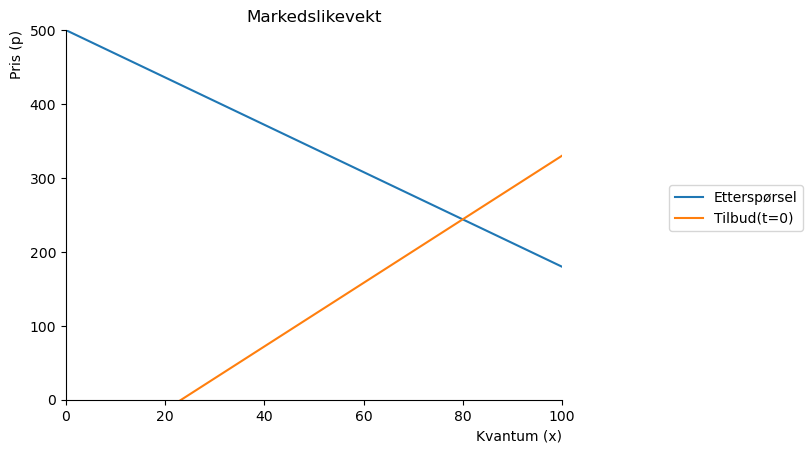

In [9]:
x_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,500))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(x_num, demand(x_num), label='Etterspørsel')
ax.plot(x_num, supply(x_num,0), label='Tilbud(t=0)')



# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

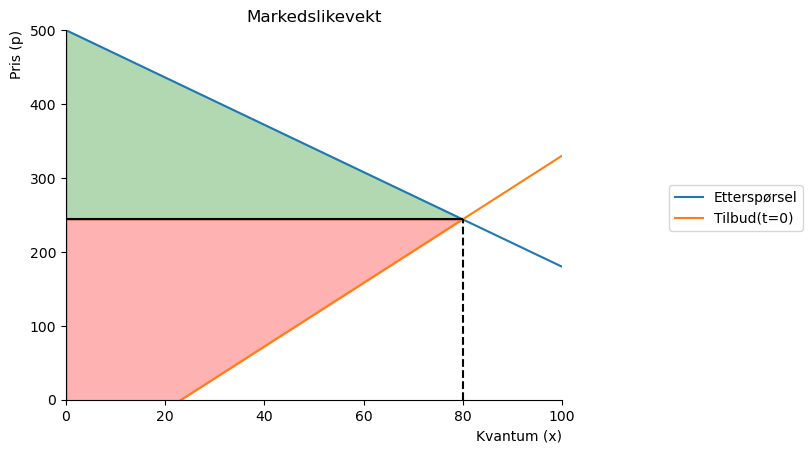

In [10]:
q=np.linspace(0.1,x_eq,100)

ax.vlines(x_eq_fn(0),0,demand(x_eq_fn(0)), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq,0,x_eq_fn(0), color='black',ls='solid', label='p_eq')
ax.fill_between(q,p_eq,demand(q), color = "green",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(q,supply(q,0),p_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')
fig

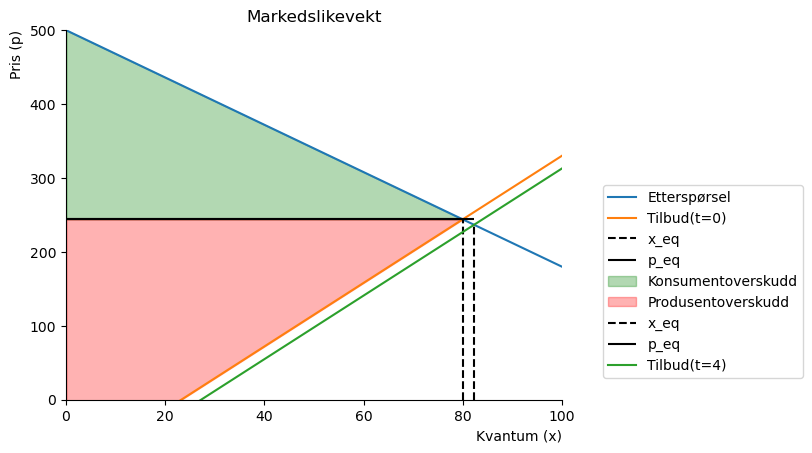

In [11]:
r =  np.linspace(0,x_eq,100)
ax.vlines(x_eq_fn(4),0,demand(x_eq_fn(4)), color='black',ls='dashed', label='x_eq')
ax.hlines(p_eq,0,x_eq_fn(4), color='black',ls='solid', label='p_eq')
ax.plot(x_num, supply(x_num,4), label='Tilbud(t=4)')
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

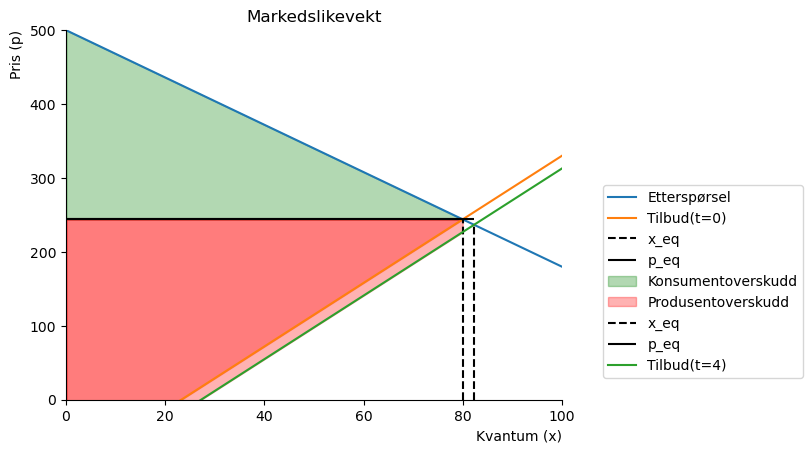

In [12]:
ax.fill_between(q,supply(q,4),p_eq, color = "red",alpha = 0.3,label='Produsentoverskudd')
fig

In [13]:
from IPython.display import Markdown

In [97]:
def producer_surplus(p,t):
    return sp.integrate(p_eq-supply(p,0),(p,t,x_eq))
ps_t0 = producer_surplus(p,0)
ps_t4 = producer_surplus(p,4)

In [104]:
def consumer_surplus(p,t):
    return sp.integrate(demand(p)-p_eq,(p,t,x_eq))

cs_t0 = consumer_surplus(p,0)
cs_t4 = consumer_surplus(p,4)

cs_t4

9241.60000000000

In [115]:
KO_PO=cs_t0+ps_t0
KO_POt=cs_t4+ps_t4

In [95]:
def welfare_surplus(p,t):
    return sp.integrate(demand(p)-supply(p,t),(p,0,x_eq))


ws_t0 = welfare_surplus(p,0)
ws_t4 = welfare_surplus(p,4)

from IPython.display import Markdown

tbl=f"""


|                     | Før avgift               | Etter avgift        |     Endring (etter avgift-før avgift)        |
| :-------------------| :----------------------:|:-------------------------:|:-------------------------:|
| Konsumentpris:      | {p_eq}              |   {p}      |                         |
| Produsentpris:      |  {x_eq}             |    {x}        |                    |
| Kvantum:            | {np.round(float(x_eq),2)}              |                    |                         |
| Produsentoverskudd: |  ${np.round(float(ps_t0),2)}$                 | { p2  }                |   { p2 - p1 }      |
| Konsumentoverskudd: |${np.round(float(consumer_surplus(p,t)))}$                    |      { c2}                |   { c2-c1  }       |
| KO+PO:              | {{np.round(float(ws_t0),2)}  }                  | { c2+p2 }                   |  { (c2+p2)-(c1+p1) }       |
| Skatteproveny:      |              |                        |                         |
| Dødvektstap:        |              |                      |                          |
"""
display(Markdown(tbl))

In [141]:
tbl=f"""
|                     | Før avgift               | Etter avgift        |     Endring (etter avgift-før avgift)        |
| :-------------------| :----------------------:|:-------------------------:|:-------------------------:|
| Konsumentpris:      | {p_eq}              |  {kp}             |    {kp-p_eq}                     |
| Produsentpris:      |  {p_eq}            |    {pp}          |      {pp-p_eq}              |
| Kvantum:            | {np.round(float(x_eq),2)}              |  {x_eqt}                     |   {x_eq-x_eqt}                         |
| Produsentoverskudd: | $ ${np.round(float(ps_t0),2)}    | {np.round(float(ps_t4),2)}               | {np.round(float(ps_t4),2)-np.round(float(ps_t0),2)}    |
| Konsumentoverskudd: | {np.round(float(cs_t0))}                    | {np.round(float(cs_t4))}                     |{np.round(float(cs_t0))-np.round(float(cs_t4))}        |
| KO+PO:              | {np.round(float(KO_PO))}               |  {np.round(float(KO_POt))}                         |  {np.round(float(KO_POt))-np.round(float(KO_PO))}         |
| Skatteproveny:      |         {0}   |    {x_eqt*4}           |     {x_eqt*4}                       |
| Dødvektstap:        |         {0}   |           {(x_eqt*pp)-p_eq*x_eq}               |   {(x_eqt*pp)-p_eq*x_eq}                         |





"""
display(Markdown(tbl))


|                     | Før avgift               | Etter avgift        |     Endring (etter avgift-før avgift)        |
| :-------------------| :----------------------:|:-------------------------:|:-------------------------:|
| Konsumentpris:      | 244.0              |  248.0             |    4.0                     |
| Produsentpris:      |  244.0            |    240.0          |      -4.0              |
| Kvantum:            | 80.0              |  82.29333333333334                     |   -2.2933333333333366                         |
| Produsentoverskudd: | $ $13760.0    | 12418.4               | -1341.6000000000004    |
| Konsumentoverskudd: | 10240.0                    | 9242.0                     |998.0        |
| KO+PO:              | 24000.0               |  21660.0                         |  -2340.0         |
| Skatteproveny:      |         0   |    329.17333333333335           |     329.17333333333335                       |
| Dødvektstap:        |         0   |           230.40000000000146               |   230.40000000000146                         |





